# Author: Keshab Kumar

# Created on: 22-10-2024

# Import libraries required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Create Dataframe for the CSV data

In [2]:
df = pd.read_csv("crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


# Details about the Dataset

In [3]:
print("The Shape of the Dataset:",df.shape)

The Shape of the Dataset: (2200, 8)


In [7]:
print("No. of Rows in the Dataset:", df.shape[0])

No. of Rows in the Dataset: 2200


In [8]:
print("No. of Column in the Dataset:",df.shape[1])

No. of Column in the Dataset: 8


In [18]:
len(df)

2200

# Statistics of the Dataset

In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
cond1 = df['label']=='rice'

In [13]:
df[cond1]

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [16]:
df.sort_values(by='N',ascending = False)

,N,P,K,temperature,humidity,ph,rainfall,label
1950,140,40,17,22.727672,77.075981,6.006086,77.551763,cotton
1912,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton
1978,140,45,15,25.530827,80.046628,5.801048,99.395572,cotton
1928,139,35,15,25.248679,83.463015,5.898293,86.555178,cotton
1974,136,36,24,22.744470,80.411985,7.597820,90.073266,cotton
...,...,...,...,...,...,...,...,...
829,0,65,24,28.495844,62.446162,7.841496,53.145310,lentil
382,0,55,22,22.986669,20.579406,5.916779,143.858494,kidneybeans
346,0,65,15,23.461683,23.221976,5.645436,95.842534,kidneybeans
1507,0,123,205,22.027754,92.961295,5.790993,121.134918,apple


In [17]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [20]:
df_cleaned = df.drop_duplicates()

In [21]:
len(df_cleaned)

2200

In [22]:
print("No. of Duplicates:",len(df)-len(df_cleaned))

No. of Duplicates: 0


# Outliers

<Axes: ylabel='K'>

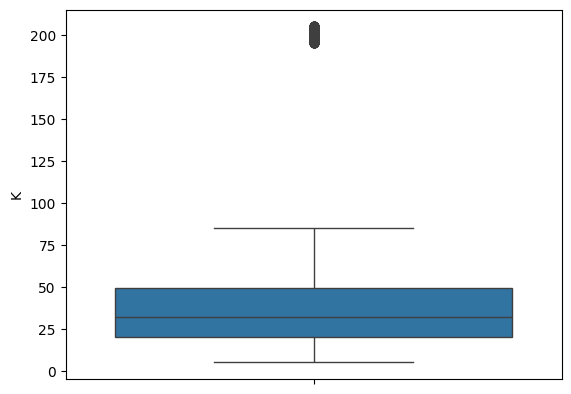

In [23]:
sns.boxplot(y='K',data=df)

In [27]:
def remove_outliers(col_name):
    sorted(col_name)
    Q1, Q3 = col_name.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower = Q1 - 1.5*IQR
    upper =  Q3 + 1.5*IQR
    return lower, upper

In [29]:
low, high = remove_outliers(df['K'])

In [30]:
low

-23.5

In [31]:
high

92.5

In [36]:
df['K'] = np.where(df['K']>high,high,df['K'])

<Axes: ylabel='K'>

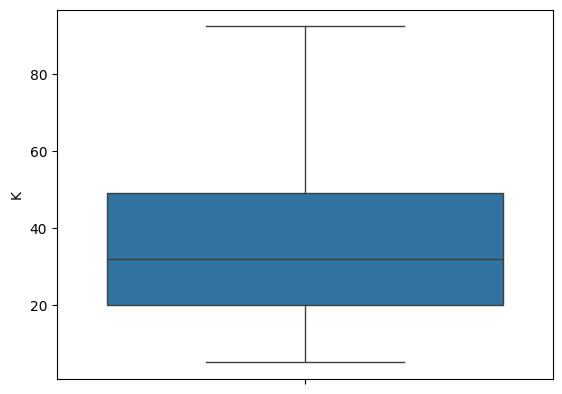

In [37]:
sns.boxplot(y='K',data = df)

In [39]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43.0,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41.0,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44.0,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40.0,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42.0,20.130175,81.604873,7.628473,262.717340,rice


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'rice'),
  Text(1, 0, 'maize'),
  Text(2, 0, 'chickpea'),
  Text(3, 0, 'kidneybeans'),
  Text(4, 0, 'pigeonpeas'),
  Text(5, 0, 'mothbeans'),
  Text(6, 0, 'mungbean'),
  Text(7, 0, 'blackgram'),
  Text(8, 0, 'lentil'),
  Text(9, 0, 'pomegranate'),
  Text(10, 0, 'banana'),
  Text(11, 0, 'mango'),
  Text(12, 0, 'grapes'),
  Text(13, 0, 'watermelon'),
  Text(14, 0, 'muskmelon'),
  Text(15, 0, 'apple'),
  Text(16, 0, 'orange'),
  Text(17, 0, 'papaya'),
  Text(18, 0, 'coconut'),
  Text(19, 0, 'cotton'),
  Text(20, 0, 'jute'),
  Text(21, 0, 'coffee')])

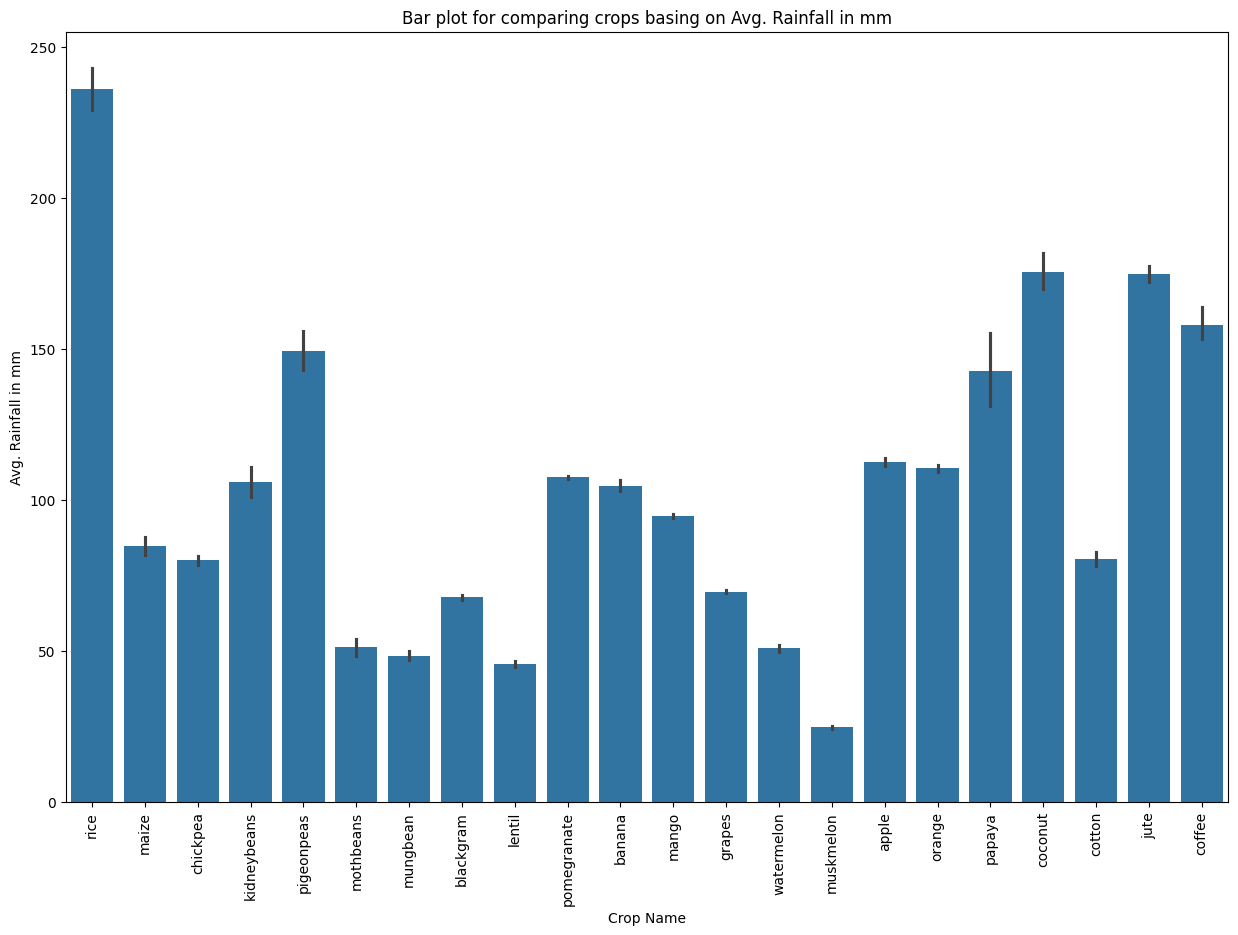

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'label',y = 'rainfall',data = df,estimator = 'mean')
plt.title("Bar plot for comparing crops basing on Avg. Rainfall in mm")
plt.xlabel('Crop Name')
plt.ylabel('Avg. Rainfall in mm')
plt.xticks(rotation=90)